In [1]:
import torch

In [9]:
# grad can only be enabled for floating point tensors
a = torch.tensor([1, 2, 3], requires_grad=True)
b = torch.tensor([4., 5., 6.], requires_grad=True)


RuntimeError: Only Tensors of floating point and complex dtype can require gradients

In [24]:
a = torch.tensor([1., 2., 3.], requires_grad=True)
b = torch.tensor([4., 5., 6.], requires_grad=True)


In [25]:
Q =3 * a ** 3 - b ** 2


In [26]:
Q

tensor([-13.,  -1.,  45.], grad_fn=<SubBackward0>)

In [27]:
external_grad = torch.tensor([1., 1., 1.])

In [28]:
Q.backward(gradient=external_grad)

In [29]:
external_grad

tensor([1., 1., 1.])

In [30]:
print(9*(a**2) == a.grad)

tensor([True, True, True])


In [32]:
print(-2*b == b.grad)

tensor([True, True, True])


In [34]:
-2*b

tensor([ -8., -10., -12.], grad_fn=<MulBackward0>)

In [35]:
b.grad

tensor([ -8., -10., -12.])

In [49]:
# let's check micrograd

from micrograd.engine import Value
from micrograd import nn
import graphviz
from graphviz import Digraph

In [53]:
def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root, format='svg', rankdir='LR'):
    """
    format: png | svg | ...
    rankdir: TB (top to bottom graph) | LR (left to right)
    """
    assert rankdir in ['LR', 'TB']
    nodes, edges = trace(root)
    dot = Digraph(format=format, graph_attr={'rankdir': rankdir}) #, node_attr={'rankdir': 'TB'})
    
    for n in nodes:
        dot.node(name=str(id(n)), label = "{ data %.4f | grad %.4f }" % (n.data, n.grad), shape='record')
        if n._op:
            dot.node(name=str(id(n)) + n._op, label=n._op)
            dot.edge(str(id(n)) + n._op, str(id(n)))
    
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    
    return dot

In [54]:
n = nn.Neuron(2)
x= [Value(1.0), Value(2.0)]
y = n(x)
dot = draw_dot(y)

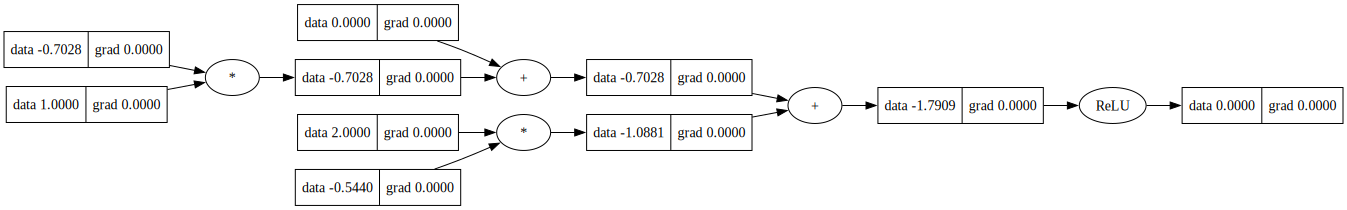

In [56]:
dot